#### 15. 토플과 토익은 미국의 ETS가 주관하는 영어시험이다. 토플과 토익은 서로 다른 목적으로 개발된 시험이기 때문에 문제 내용과 구성이 다르지만, 두 시험 점수 간의 관련성이 있는 것으로 알려졌다. 아래는 임의로 선출된 20명의 학생에게 토플과 토익시험을 모두 치르게 한 뒤 관찰된 자료이다. 

In [5]:
# Assigning data
toefl <- c(83, 80, 67, 97, 104,
           57, 65, 89, 96, 80,
           104, 77, 68, 73, 75,
           80, 64, 64, 62, 92)
toeic <- c(840, 720, 605, 780, 920,
           585, 645, 670, 770, 635,
           960, 665, 715, 605, 505,
           795, 650, 590, 525, 815)

df_q15 <- data.frame(toefl, toeic)

#### a. 토플점수를 X변수, 토익점수를 Y변수로 하는 산점도를 그리고, 두 변수 간의 선형관계가 존재하는지 확인하여라.
산점도를 그려보면 다음과 같다. 

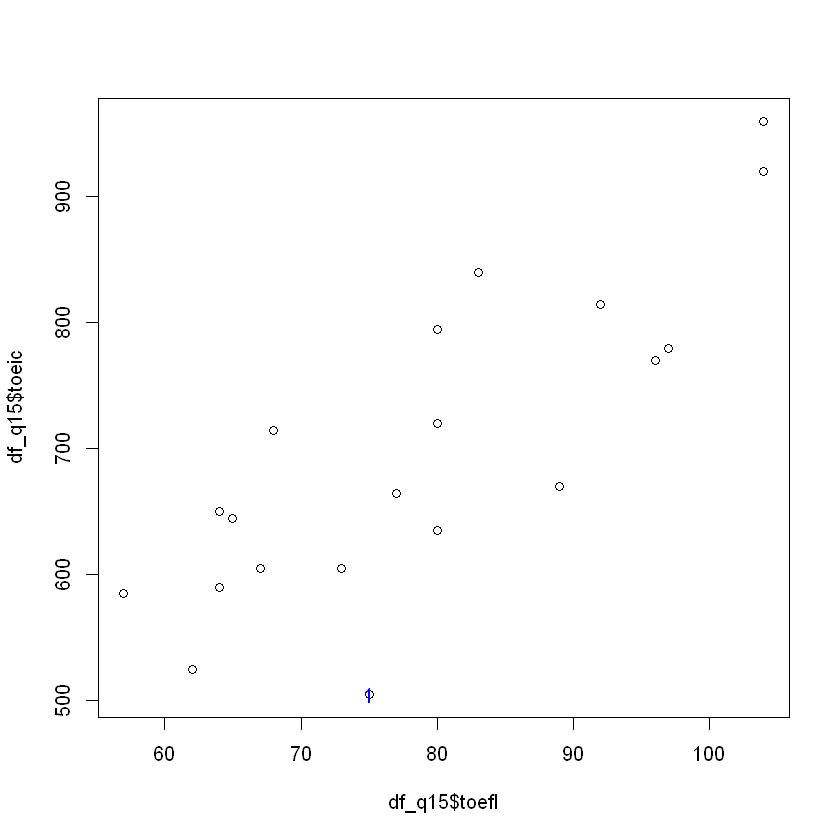

In [6]:
# Scatter plot
plot(df_q15$toeic ~ df_q15$toefl)

## Outlier
outlier_q15 <- which(df_q15$toefl == 75)
text(df_q15$toefl[outlier_q15], df_q15$toeic[outlier_q15], col = "blue")

이때 파란색으로 표시한 토플점수가 75, 토익점수가 505인 15번째 데이터가 특잇값(outlier)임을 확인할 수 있다. 특잇값을 제외한 나머지 자료들은 선형관계에 잘 맞는 형태를 보여주고 있다. 따라서 특잇값을 제거하고 회귀분석을 해야 한다. 

In [7]:
# Eliminate outlier
df_q15 <- df_q15[-c(15),]

#### b. 토플점수와 토익점수 간의 표본상관계수를 계산하여라.

상관계수는 두 숫자형 변수 사이의 선형적 강도를 나타내기 위한 통계량으로, 공분산을 각 변수의 표준편차로 나누어 구한다. 토플점수와 토익점수 간의 상관계수는 0.85(85%)이다. 일반적으로 상관계수의 절댓값이 0.8 ~ 1.0이면 강한 선형관계를 가진다고 본다. 

In [8]:
# Correaltion coefficient
cor(df_q15$toefl, df_q15$toeic)

## Calculation
toefl.mean <- mean(df_q15$toefl)
toeic.mean <- mean(df_q15$toeic)
toefl.sd <- sd(df_q15$toefl)
toeic.sd <- sd(df_q15$toeic)

(cor_q15 <- (sum((df_q15$toefl - toefl.mean) * (df_q15$toeic - toeic.mean)) / 18) / (toefl.sd * toeic.sd)) 
# n - 1, n = 19

[1] 0.8519601

[1] 0.8519601

산점도와 상관계수를 통해 두 변수 간에는 선형적 연관성이 있음을 확인할 수 있다. 따라서 회귀모형을 다음과 같이 세울 수 있다. 
$$
토익점수_{i} = \beta_{0} + \beta_{1} * 토플점수_{i} + \epsilon_{i}
$$

#### c. 토플점수로 토익점수를 예측하는 단순회귀식을 최소제곱추정법으로 추정하고, 추정된 회귀식을 구하여라. 이를 회귀식1이라고 하자. 

최소제곱추정법으로 토플점수로 토익점수를 예측하는 회귀모형을 추정하면 다음과 같다.

In [9]:
# LSM: regression equation 1
## linear model
fit_q15 <- lm(df_q15$toeic ~ df_q15$toefl)
summary(fit_q15)

## Calculation
(b1_q15 <- cor_q15 * toeic.sd / toefl.sd)
(b0_q15 <- toeic.mean - (b1_q15 * toefl.mean))


Call:
lm(formula = df_q15$toeic ~ df_q15$toefl)

Residuals:
     Min       1Q   Median       3Q      Max 
-108.580  -55.287    3.469   40.891  102.786 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   164.988     82.554   1.999   0.0619 .  
df_q15$toefl    6.894      1.028   6.709 3.67e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 63.97 on 17 degrees of freedom
Multiple R-squared:  0.7258,	Adjusted R-squared:  0.7097 
F-statistic: 45.01 on 1 and 17 DF,  p-value: 3.67e-06


[1] 6.894287

[1] 164.9885

최소제곱추정법으로 추정된 회귀식1은 다음과 같다.
$$
\hat{y} = 164.99 + 6.89x
$$

#### d. 유위수준 5%에서 토플점수와 토익점수가 선형적으로 연관성이 없다는 귀무가설을 검정하여라.
추정된 회귀식1의 기울기 $\beta_{1}$이 0이라면 X변수가 사라지고 y절편만 남아 토플점수와 토익점수 간에는 선형적 연관성이 없게 된다. 따라서 두 변수 간의 선형적 연관성이 통계적으로 유의한지 검정하기 위한 가설은 다음과 같이 설정할 수 있다.

> H0: $b_{1} = 0$ <br> H1: $b_{1} \neq 0$

최소제곱추정법으로 구한 회귀식이 유효하기 위해선 모형의 오차항이 다음과 같은 가정사항을 충족해야 한다.  

$$
\epsilon_{i} \sim  iid N(o, \sigma^2)
$$

 
1. 등분산성: 모든 오차항( 𝜖𝑖 )들의 평균은 0이고, 분산은  𝜎2 로 동일하다.
2. 독립성: 오차항( 𝜖𝑖 )들은 서로 독립이다.
3. 정규성: 오차항( 𝜖𝑖 )은 정규분포를 따른다.


가정사항을 충족한다는 가정하에서 t검정과 F검정을 수행하면 다음과 같다.

In [10]:
# t-test
toeic.hat <- b0_q15 + (b1_q15 * df_q15$toefl)

SSE_q15 <- sum((df_q15$toeic - toeic.hat) ^ 2)
SSR_q15 <- sum((toeic.hat - toeic.mean) ^ 2)
SST_q15 <- SSE_q15 + SSR_q15

MSE_q15 <- SSE_q15 / 17
sb1_q15 <- sqrt((MSE_q15) / sum((df_q15$toefl - toefl.mean) ** 2))

## t value
(t.value_q15 <- b1_q15 / sb1_q15)

## p value
(pt(t.value_q15, 17, lower.tail = F) * 2)

[1] 6.708702

[1] 3.670465e-06

t검정 결과 기울기 $\beta_{1}$의 통계적 유의성에 대한 p값은 매우 작다. 따라서 유의수준 5%하에서 귀무가설은 기각된다. 따라서 기울기 $\beta_{1}$은 통계적으로 0이 아니며, 토익점수와 토플점수 간에는 통계적으로 유의한 선형관계가 있는 것으로 해석할 수 있다. 이때 특잇값을 제외했기 때문에 전체 자료의 수는 19개이며, 따라서 t값은 근사적으로 자유도가 17인 t분포를 따른다. 

In [11]:
# F test
## f value
(f.value_q15 <-  SSR_q15 / MSE_q15) # 1, 17

## p value
(pf(f.value_q15, 1, 17, lower.tail = F))

[1] 45.00668

[1] 3.670465e-06

F검정 결과 기울기 $\beta_{1}$의 통계적 유의성에 대한 p값은 매우 작다.따라서 유의수준 5%하에서 귀무가설은 기각된다. 따라서 기울기 $\beta_{1}$은 통계적으로 0이 아니며, 토익점수와 토플점수 간에는 통계적으로 유의한 선형관계가 있는 것으로 해석할 수 있다.

이때 t검정과 F검정 결과 p값이 동일하다는 것을 확인할 수 있다. 이는 단순선형회귀모형에서는 기울기가 $\beta_{1}$ 하나이기 때문에 개별적 검정인 t검정과 총체적 검정인 F검정의 귀무가설과 대립가설이 동일한 형태가 되기 때문이다. 따라서 p값, 귀무가설의 기각여부 등의 통계적 검정의 결과도 완벽하게 일치하게 된다. 

#### e. 회귀식1의 결정계수를 추정하고 이를 설명하여라. 
결정계수는 추정한 회귀식이 얼마나 자료를 잘 정리 요약하여 반영하고 있는지 하나의 척도로 나타낸 것이다. Y의 총변동량(SST) 중 추정된 회귀식이 설명하는 변동량(SSR)의 비중이 크면 클수록 회귀식이 원래의 자료를 잘 정리 요약하여 반영하고 있다고 할 수 있다. 

In [12]:
# R squared
(r2_q15 <- SSR_q15 / SST_q15)

[1] 0.725836

결정계수는 0과 1 사이의 값을 가지는데, 1에 가까운 큰 값일수록 적절한 회귀모형으로 해석된다. 이 경우에는 약 0.73(73%) 정도로, 최소제곱추정법으로 구한 회귀식은 적합하다고 볼 수 있다. 산점도 위에 추정된 회귀식1을 나타내면 다음과 같다.

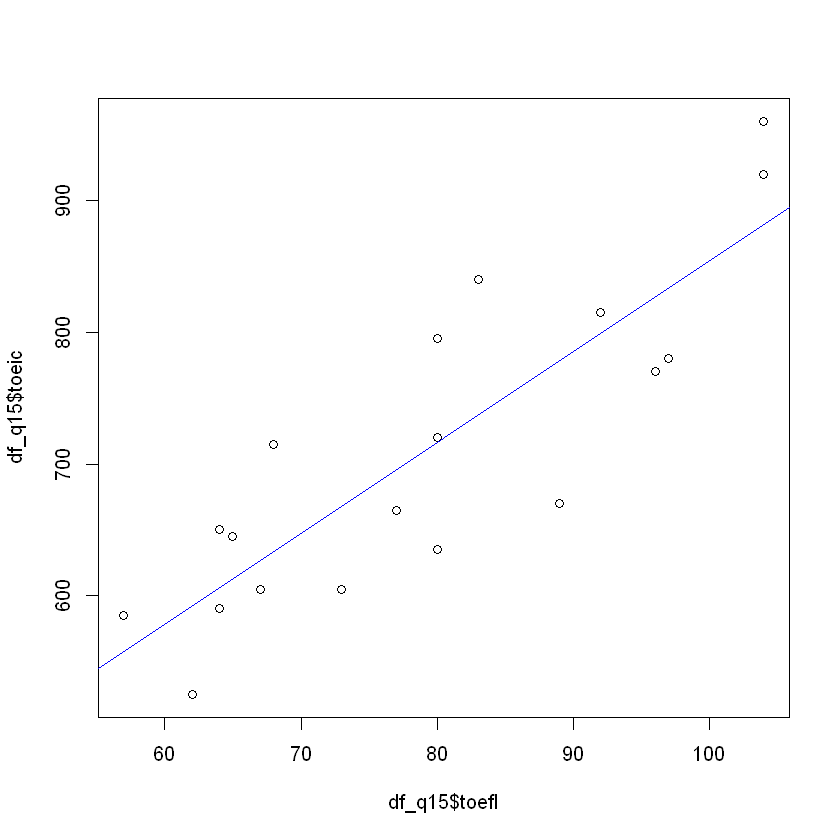

In [13]:
plot(df_q15$toeic ~ df_q15$toefl)
abline(fit_q15, col = "blue")

더불어, 잔차그림을 통해 잔차들이 띠모양으로 분포하고 있음을 확인할 수 있다.

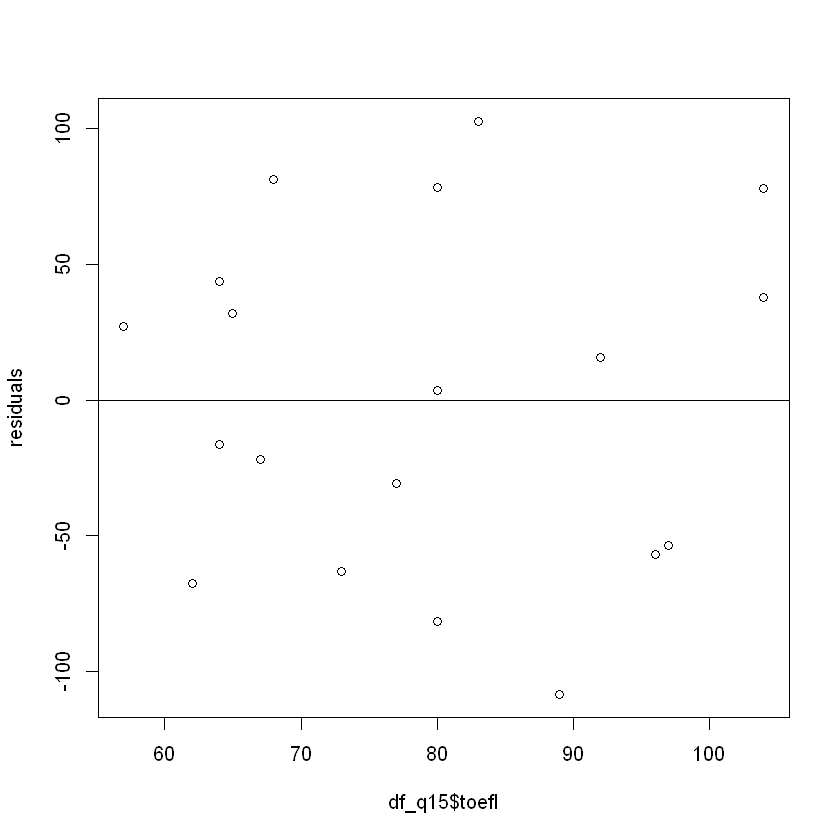

In [14]:
# Residual plot
plot(df_q15$toefl, fit_q15$residuals, ylab = "residuals")
abline(h=0)

#### f. 이번에는 토익점수로 토플점수를 예측하는 단순회귀식을 최소제곱추정법으로 추정하고, 추정된 회귀식을 구하여라. 이를 회귀식2라고 하자.

우선 토익점수를  X변수, 토플점수를 Y변수로 하는 산점도를 그리면 다음과 같다.

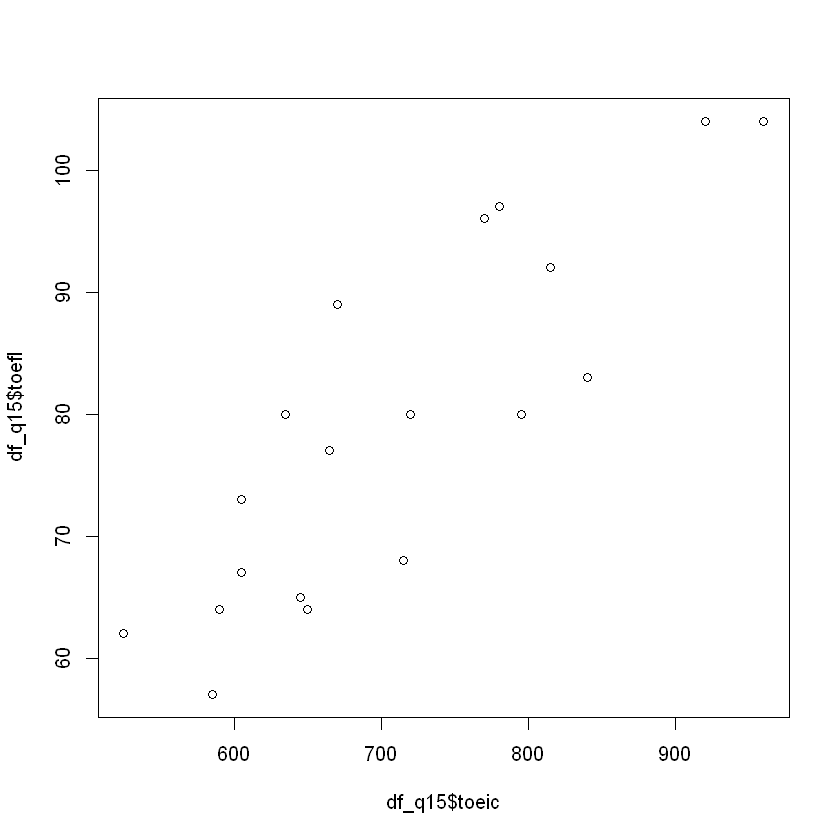

In [15]:
# Scatter plot
plot(df_q15$toefl ~ df_q15$toeic)

두 변수 간에는 선형적 연관성이 있음을 확인할 수 있다. 따라서 다음과 같은 회귀모형을 세울 수 있다. 


In [16]:
# LSM: regression equation 2
## linear model
fit_q15.2 <- lm(df_q15$toefl ~ df_q15$toeic)
summary(fit_q15.2)

## Calculation
(b1_q15.2 <- cor_q15 * toefl.sd / toeic.sd)
(b0_q15.2 <- toefl.mean - (b1_q15.2 * toeic.mean))


Call:
lm(formula = df_q15$toefl ~ df_q15$toeic)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5790  -7.6054  -0.1054   3.9201  14.1586 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.30327   11.28878   0.381    0.708    
df_q15$toeic  0.10528    0.01569   6.709 3.67e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.905 on 17 degrees of freedom
Multiple R-squared:  0.7258,	Adjusted R-squared:  0.7097 
F-statistic: 45.01 on 1 and 17 DF,  p-value: 3.67e-06


[1] 0.1052808

[1] 4.303272

최소제곱추정법으로 회귀식2를 구하면 다음과 같다. 
$$
\hat{y} = 4.30 + 0.11x
$$
산점도 위에 추정된 회귀식2를 나타내면 다음과 같다.

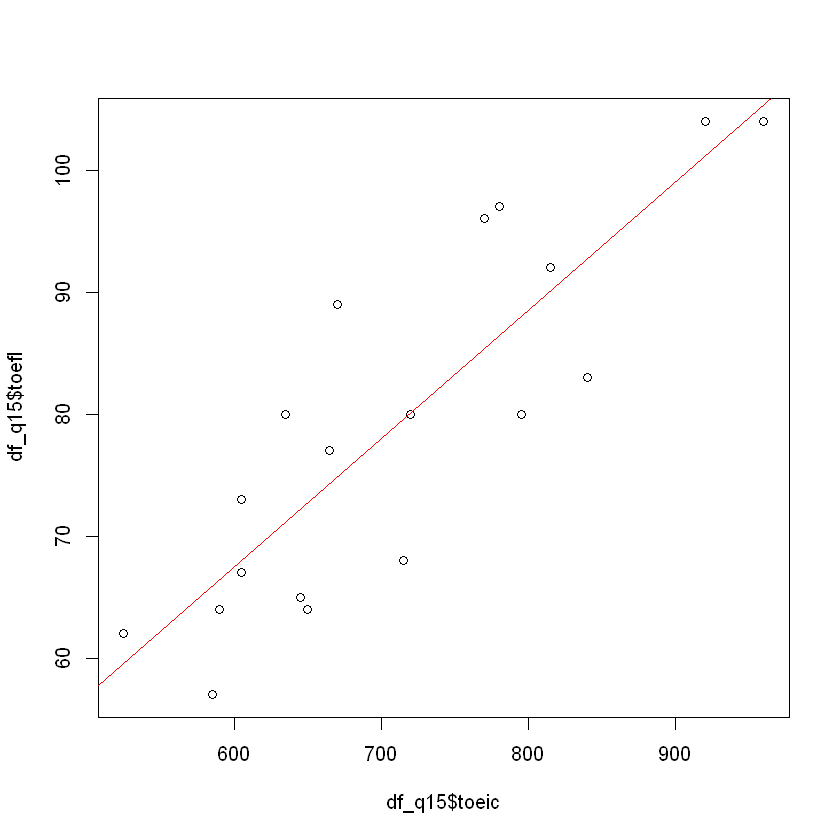

In [17]:
plot(df_q15$toefl ~ df_q15$toeic)
abline(fit_q15.2, col = "red")

#### g. 회귀식2를 회귀식1처럼 토플점수로 토익점수를 계산하는 식으로 표현할 수 있다. 이렇게 표현된 식이 회귀식1과 다르다는 것을 확인하고, 그 이유에 대해 논하여라. 

회귀식2를 회귀식1(빨간선)처럼 토플점수로 토익점수를 계산하는 식으로 표현하기 위해 회귀식2의 역함수(파란선)를 구하면 다음과 같다. 

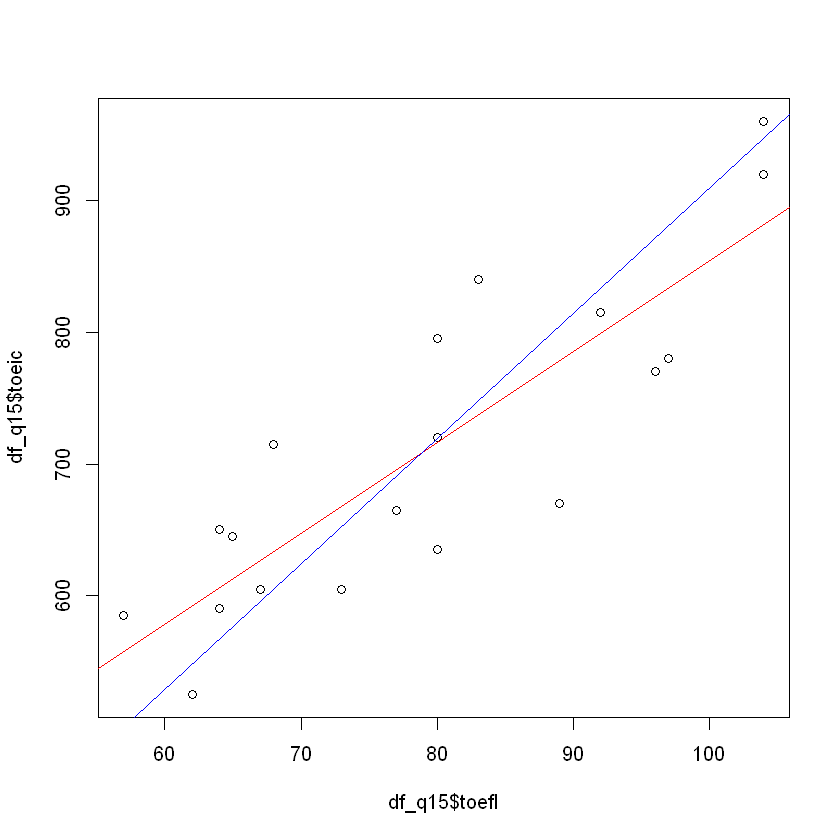

In [18]:
plot(df_q15$toeic ~ df_q15$toefl)

# equation 1
abline(fit_q15, col = "red")

# reverse equation 2
abline(a = -fit_q15.2$coefficients[1]/fit_q15.2$coefficients[2],
       b = 1/fit_q15.2$coefficients[2], col = "blue")

회귀식2의 역함수는 회귀식1과 일치하지 않는다. 이러한 차이는 최소제곱추정법으로 회귀계수를 추정하기 때문에 발생한다. 최소제곱추정법으로 구한 회귀식1과 2의 기울기 추정값은 다음과 같다. 

$$
회귀식1의 b_{1} = r_{xy}\frac{S_{y}}{S_{x}}
$$
$$
회귀식2의 b_{1} = r_{xy}\frac{S_{x}}{S_{y}}
$$

회귀식2의 역함수가 회귀식1과 일치하기 위해선 회귀식2의 $b_{1}$의 역수가 회귀식1의 $b_{1}$와 일치해야 하지만, 최소제곱추정법으로 추정할 경우 일치하지 않는다. 


#### 17. 동물학자인 최 박사는 동물의 몸무게와 뇌의 무게 간의 관계를 연구하고 있다. 임의로 추출된 62개 동물에 대한 자료를 바탕으로 다음 물음에 답하여라. 
#### a. 몸무게를 X축, 뇌무게를 Y축으로 산점도를 그리고 간단히 설명하여라.

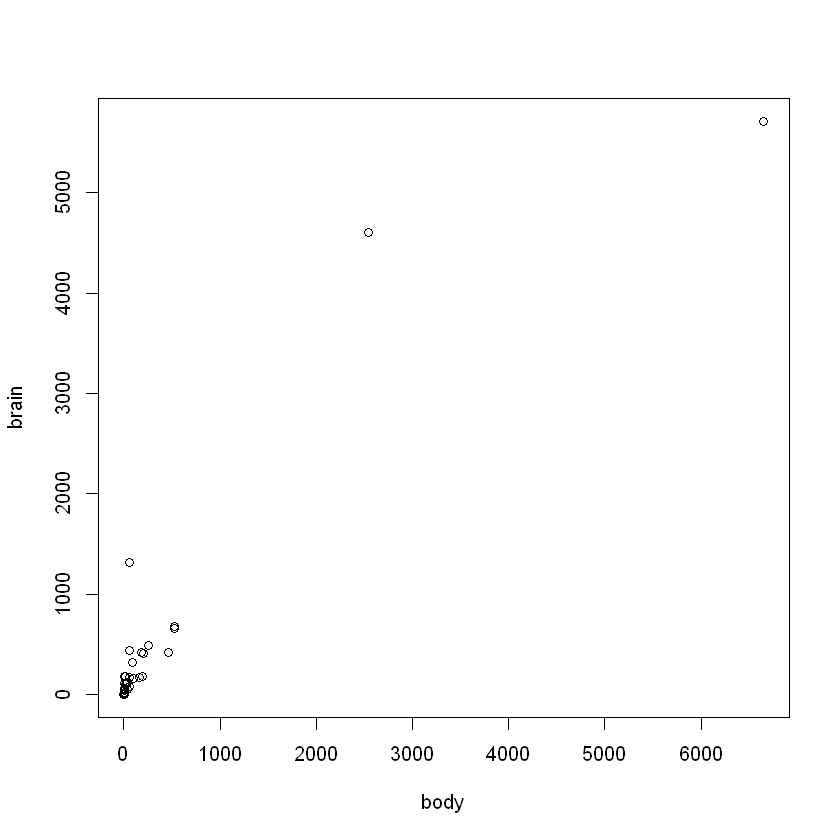

In [20]:
# Assigning data
library(MASS)
attach(mammals)

# Scatter plot
plot(brain ~ body)

산점도를 통해 대부분의 자료가 몸무게 1000이하, 뇌무게 1000이하인 범위에 치우쳐 분포하고 있음을 확인할 수 있다. 더불어 극단적으로 큰 X값과 Y값을 가지는 관찰값들이 있음을 확인할 수 있다. 그러나 X변수와 Y변수 간에는 선형적 연관성이 있으며, 따라서 선형회귀분석을 하기에 적합한 자료라고 볼 수 있다.

#### b. 종속변수를 동물의 뇌무게로, 설명변수를 동물의 몸무게로 하는 단순회귀모형을 설정하고 회귀계수를 추정하여라. 

Y변수를 동물의 뇌무게로, X변수를 동물의 몸무게로 하는 회귀모형은 다음과 같이 설정할 수 있다. 

$$
brain_{i} = \beta_{0} + \beta_{1}body_{i} + \epsilon_{i}
$$

최소제곱추정법으로 회귀계수 $\beta_{0}$와 $\beta_{1}$을 추정하면 다음과 같다. 

In [21]:
# LSM
## linear model
fit_q17 <- lm(brain ~ body)
summary(fit_q17)

## Calculation
brain.mean <- mean(mammals$brain)
body.mean <- mean(mammals$body)

brain.sd <-  sd(mammals$brain)
body.sd <- sd(mammals$body)
cor_q17 <- cor(body, brain)

(b1_q17 <- cor_q17 * brain.sd /body.sd)
(b0_q17 <- brain.mean - (b1_q17 * body.mean))


Call:
lm(formula = brain ~ body)

Residuals:
    Min      1Q  Median      3Q     Max 
-810.07  -88.52  -79.64  -13.02 2050.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 91.00440   43.55258    2.09   0.0409 *  
body         0.96650    0.04766   20.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 334.7 on 60 degrees of freedom
Multiple R-squared:  0.8727,	Adjusted R-squared:  0.8705 
F-statistic: 411.2 on 1 and 60 DF,  p-value: < 2.2e-16


[1] 0.9664964

[1] 91.0044

따라서 추정된 회귀식은 다음과 같다.

$$
\hat{y} = 91.00 + 0.97x
$$

산점도 위에 추정된 회귀식을 나타내면 다음과 같다. 

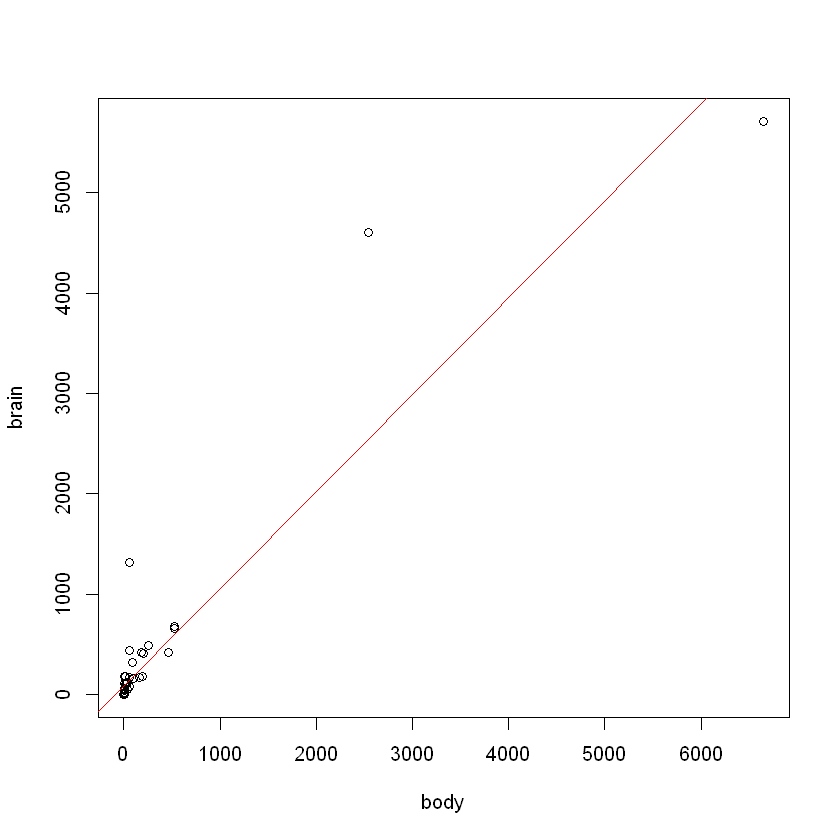

In [23]:
plot(brain ~ body)
abline(fit_q17, col = "red")

#### c. 동물의 뇌무게와 동물의 몸무게가 각각 정규분포를 따른다고 볼 수 있는가? 만약, 그렇지 않다면 (b)에서 추정된 회귀식은 타당하다고 볼 수 있는가?

두 변수 각각에 대한 히스토그램은 다음과 같다.

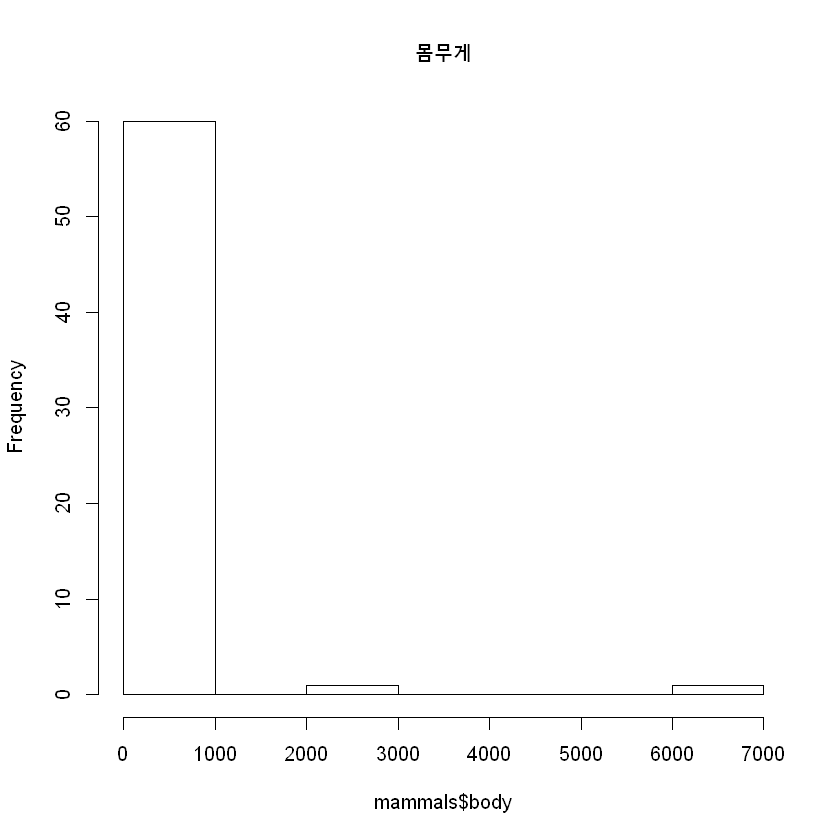

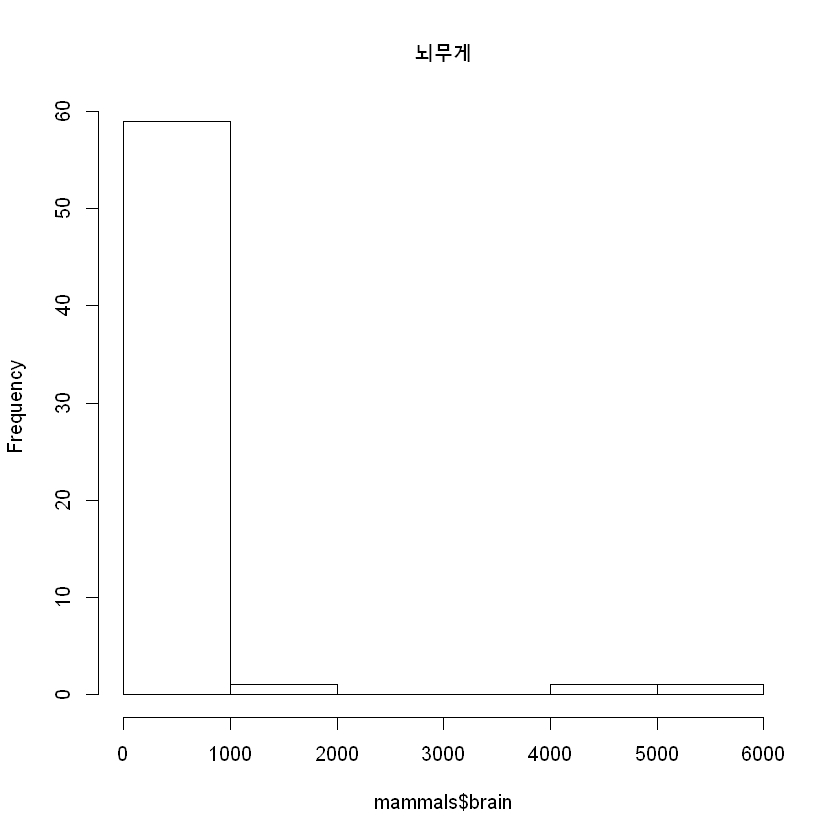

In [25]:
# Histrogram
hist(mammals$body, main = "몸무게")
hist(mammals$brain, main = "뇌무게")

두 변수 모두 정규분포를 따르지 않고 있다. 자료가 한쪽에 쏠려서 분포하고 있음을 확인할 수 있는데, 이렇게 자료가 치우친 경우 추정된 회귀식은 치우치지 않은 소수의 자료의 영향에 의해 치우쳐 분포하고 있는 대다수의 자료를 대표하기에 부적합할 수 있다. 따라서 보다 정확한 선형성 진단 및 회귀식 추정을 위해 변수변환을 할 필요가 있다.

#### d. (c)에서 (b)의 회귀식이 타당하지 않는다고 답했다면, 로그함수 변수변환을 통해 유의적인 단순회귀모형을 설정하고 회귀계수를 추정하여라. 또한 회귀분석 시의 가정사항을 만족하고 있는지 확인하여라. 

로그함수 변수변환을 통해 치우친 각 변수에 대한 자료의 분포를 정규분포에 가깝게 만들 수 있으며, 이때의 산점도는 다음과 같다.

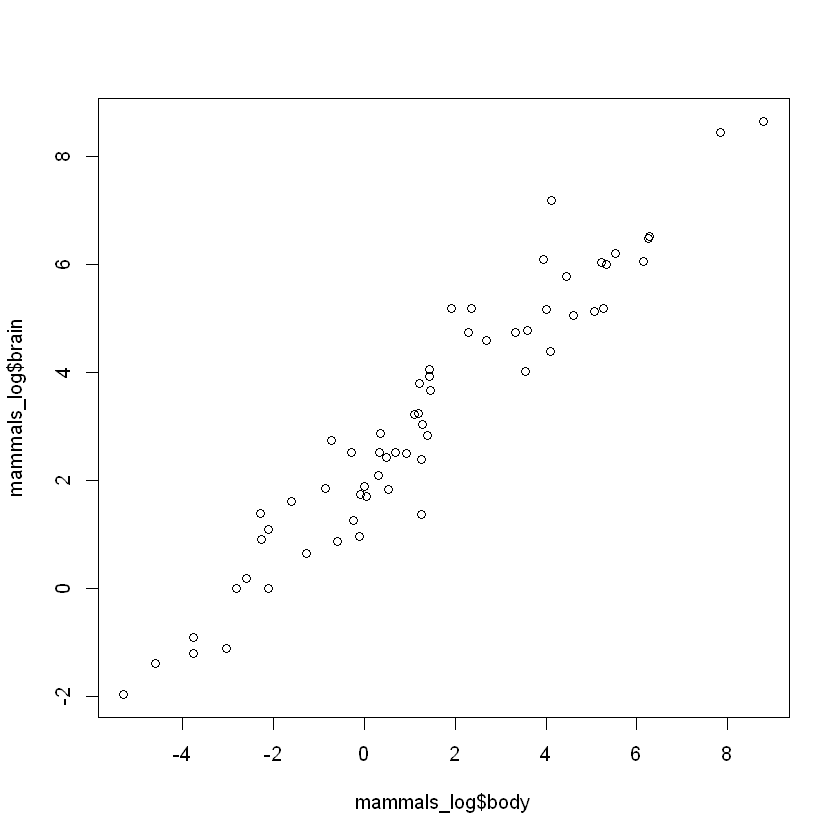

In [26]:
# Changing variables
mammals_log <- log(mammals)
plot(mammals_log$brain ~ mammals_log$body)

로그변환 후, 두 변수 간에는 보다 더 뚜렷한 선형적 연관성이 나타난다. 최고제곱추정법으로 로그변환한 자료에 대한 회귀식을 구하면 다음과 같다.

In [27]:
## LSM
## linear model
fit_q17_log <- lm(mammals_log$brain ~ mammals_log$body)
summary(fit_q17_log )

## Calculation
brain.mean_log  <- mean(mammals_log$brain)
body.mean_log  <- mean(mammals_log$body)

brain.sd_log  <-  sd(mammals_log$brain)
body.sd_log  <- sd(mammals_log$body)
cor_q17_log  <- cor(mammals_log$body, mammals_log$brain)

(b1_q17_log  <- cor_q17_log * brain.sd_log  / body.sd_log)
(b0_q17_log  <- brain.mean_log  - (b1_q17_log  * body.mean_log ))


Call:
lm(formula = mammals_log$brain ~ mammals_log$body)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71550 -0.49228 -0.06162  0.43597  1.94829 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.13479    0.09604   22.23   <2e-16 ***
mammals_log$body  0.75169    0.02846   26.41   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6943 on 60 degrees of freedom
Multiple R-squared:  0.9208,	Adjusted R-squared:  0.9195 
F-statistic: 697.4 on 1 and 60 DF,  p-value: < 2.2e-16


[1] 0.7516859

[1] 2.134789

추정된 회귀식은 다음과 같다.

$$
\hat{y} = 2.13 + 0.75x
$$

이때 $R^2$ 결정계수는 0.92(92%)로, 추정된 회귀식이 자료를 상당히 잘 나타내고 있다고 판단할 수 있다.

In [28]:
## R squared
(r2_q16 <- cor_q17_log ^ 2)

[1] 0.9207837

더불어, 잔차도를 그려보면 잔차들이 전반적으로 띠모양으로 분포하고 있음을 확인할 수 있다. 따라서 회귀모형의 오차항에 대한 가정사항도 충족하고 있다고 볼 수 있다. 

$$
\epsilon_{i} \sim  iid N(o, \sigma^2)
$$

 
1. 등분산성: 모든 오차항( 𝜖𝑖 )들의 평균은 0이고, 분산은  𝜎2 로 동일하다.
2. 독립성: 오차항( 𝜖𝑖 )들은 서로 독립이다.
3. 정규성: 오차항( 𝜖𝑖 )은 정규분포를 따른다.

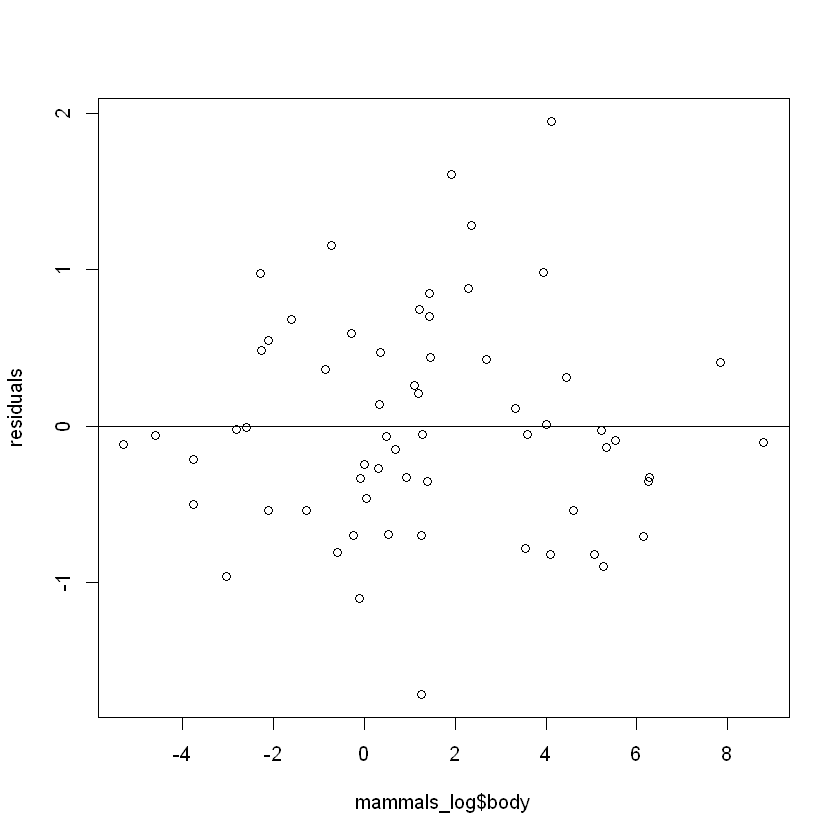

In [74]:
## Residual plot
plot(mammals_log$body, fit_q17_log$residuals, ylab = "residuals")
abline(h = 0)

#### 19. 산란기의 물고기 수(Spawners)와 그것들의 새끼가 자라서 성체가 된 물고기 수(Returns or Recruits)의 관계를 나타내는 이론적 모형은 Rickers(1954)에 의하여 다음과 같이 제시되었다. 
$$
R = \alpha_{1}S \, exp(\alpha_{2} S)
$$

다음은 Riker와 Smith(1975)에 의해 제시된 1940년부터 1970년까지 Skeena River에서 관찰된 홍연어에 대한 자료이다. 

In [3]:
# Assigning data
year <- c(1940:1967)
spawners <- c(963, 572, 305, 272, 824, 940, 486, 307,
              1066, 480, 393, 176, 237, 700,511, 87, 
              370, 448, 819, 799, 273, 936, 558, 597,
              848, 619, 397, 616)
recruits <- c(2215, 1334, 800, 438, 3071, 957, 934, 971,
              2257, 1451, 686, 127, 700, 1381, 1393, 363, 
              368, 2067, 644, 1747, 744, 1087, 1335, 1981,
              627, 1099, 1532, 2086)
df_q19 <- data.frame(year, spawners, recruits)

#### a. Recruits(Y축)과 Spawners(X축)의 산점도를 그려라. 

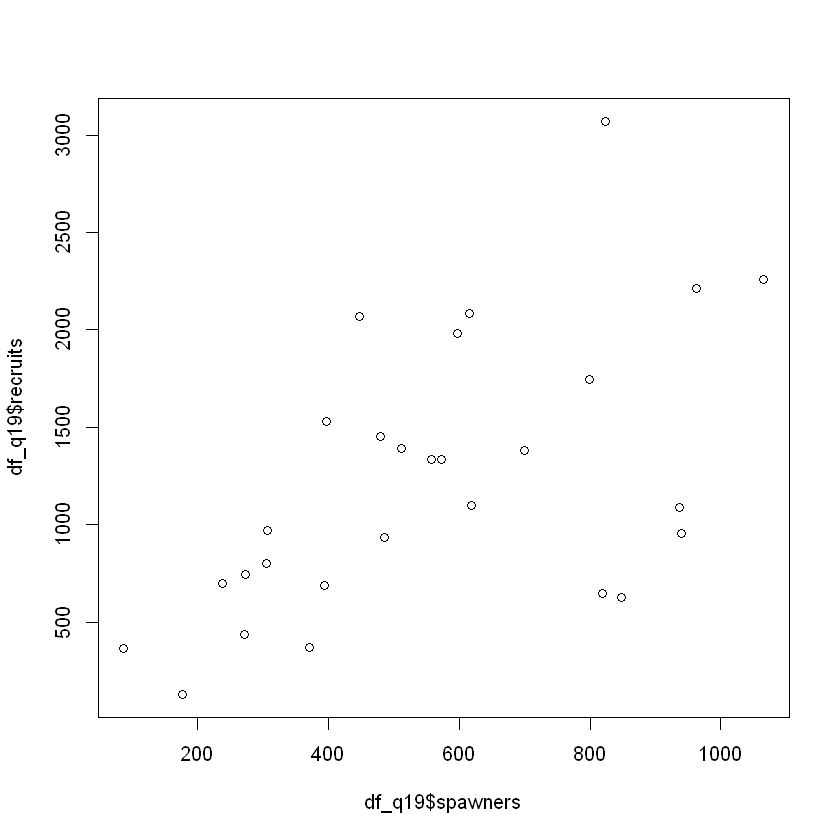

In [6]:
# Scatter plot
plot(df_q19$recruits ~ df_q19$spawners)

#### b. 1951년에 암반이 강으로 미끄러지는 일(rockslide)이 발생하여 1951년과 1955년 자료는 이상치 자료이다. 이 둘 자료를 제거하고 산점도를 그려 a와 비교하여라. 이 이후의 분석은 제거된 자료를 이용한다. 

1951년(파란색)과 1955년(빨간색) 자료를 산점도에 나타내면 다음과 같다.

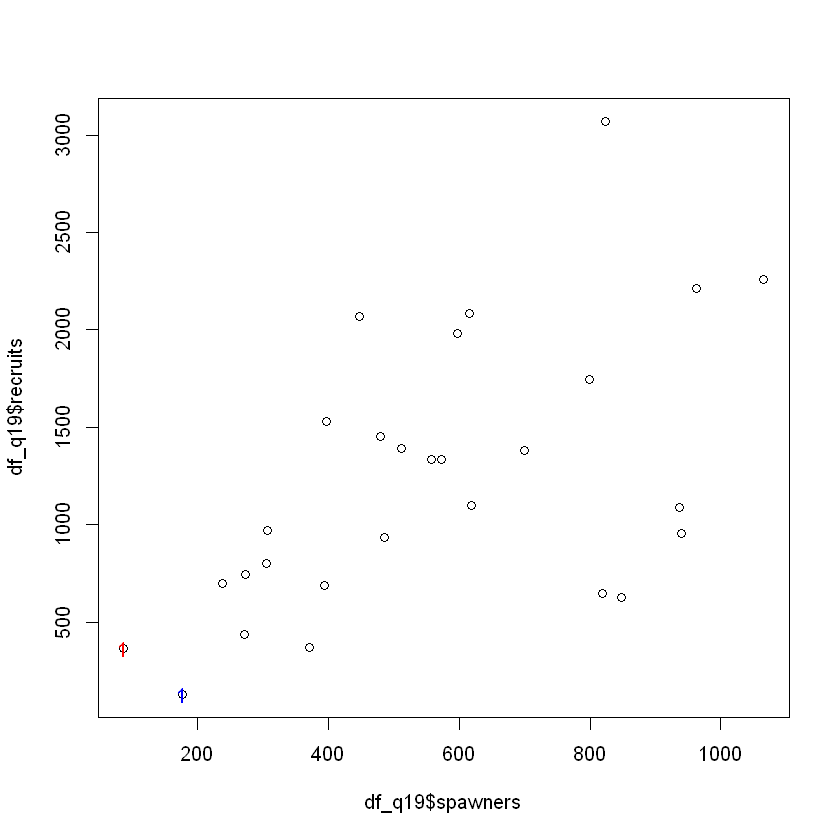

In [8]:
# Outlier
outlier_q19.1 <- which(df_q19$year == 1951)
outlier_q19.2 <- which(df_q19$year == 1955)

plot(df_q19$recruits ~ df_q19$spawners)
text(df_q19$spawners[outlier_q19.1], df_q19$recruits[outlier_q19.1], col = "blue")
text(df_q19$spawners[outlier_q19.2], df_q19$recruits[outlier_q19.2], col = "red")

이 두 자료를 제거한 다음 산점도를 그리면 다음과 같은데, 두 변수 간에 선형적 연관성이 있다고 보기는 어렵다.

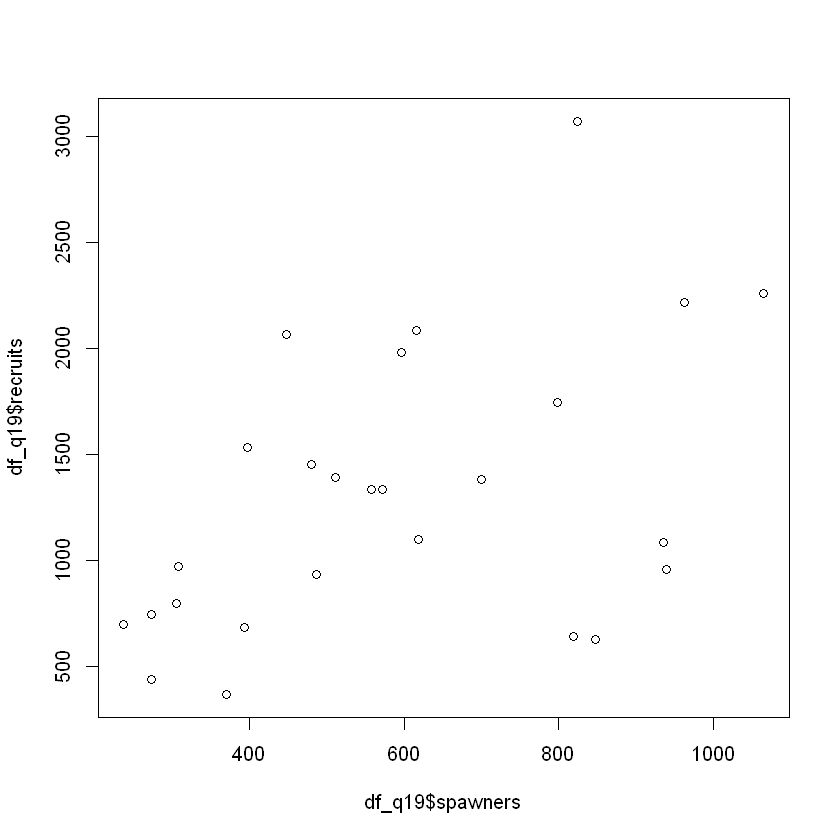

In [9]:
# Eliminate outlier
df_q19 <- df_q19[-c(12,16),]
plot(df_q19$recruits ~ df_q19$spawners)

#### c. Spawners를 X변수, Recruits를 Y변수로 회귀식을 추정하여 $R^2$값을 구하고 잔차도를 그려라.
Spawners를 X변수, Recruits를 Y변수로 하는 선형회귀모형은 다음과 같다. 

$$
Recruits_{i} = \beta_{0} + \beta_{1} * Spawners_{i} + \epsilon_{i}
$$

최소제곱추정법으로 회귀식을 구하면 다음과 같다.

In [10]:
# LSM
fit_q19 <- lm(df_q19$recruits ~ df_q19$spawners)
summary(fit_q19)

## Calculation
recruits.mean <- mean(df_q19$recruits)
spawners.mean <- mean(df_q19$spawners)

recruits.sd <-  sd(df_q19$recruits)
spawners.sd <- sd(df_q19$spawners)
cor_q19 <- cor(df_q19$spawners,df_q19$recruits)

(b1_q19 <- cor_q19 * recruits.sd / spawners.sd)
(b0_q19 <- recruits.mean - (b1_q19 * spawners.mean))


Call:
lm(formula = df_q19$recruits ~ df_q19$spawners)

Residuals:
     Min       1Q   Median       3Q      Max 
-1003.29  -337.42   -18.92   334.85  1471.04 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)     558.5993   312.7762   1.786   0.0868 .
df_q19$spawners   1.2638     0.4911   2.574   0.0167 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 601.8 on 24 degrees of freedom
Multiple R-squared:  0.2163,	Adjusted R-squared:  0.1836 
F-statistic: 6.623 on 1 and 24 DF,  p-value: 0.01667


[1] 1.263786

[1] 558.5993

추정된 회귀식은 다음과 같다.

$$
\hat{y} = 558.60 + 1.26x
$$

추정된 회귀식을 산점도 위에 나타내면 다음과 같다. 이때 회귀식에서 많이 벗어나 존재하는 특잇값들이 있음을 확인할 수 있다.

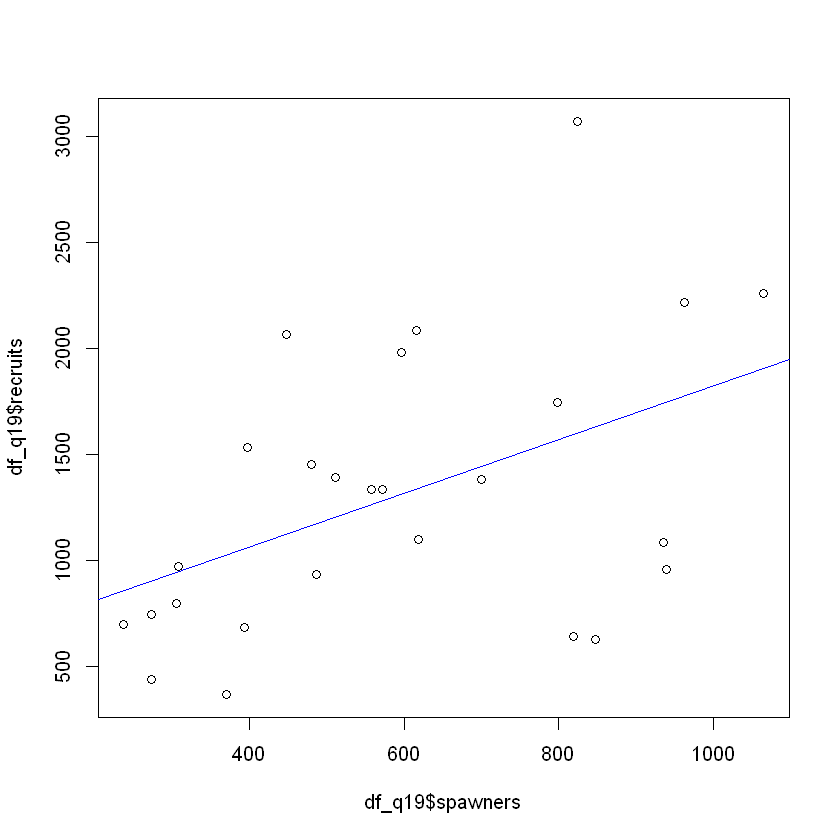

In [12]:
plot(df_q19$recruits ~ df_q19$spawners)
abline(fit_q19, col = "blue")

추정된 회귀식의 결정계수 $R^2$은 0.22(22%)로, 작은편이다. 따라서 추정된 회귀식이 자료의 분포를 잘 나타내고 있다고 보기는 어렵다.

In [13]:
# R squared
recruits.hat <- b0_q19 + (b1_q19 * df_q19$spawners)

SSE_q19 <- sum((df_q19$recruits - recruits.hat) ^ 2)
SSR_q19 <- sum((recruits.hat - recruits.mean) ^ 2)
SST_q19 <- SSE_q19 + SSR_q19

(r2_q19 <- SSR_q19 / SST_q19)

[1] 0.2162768

더불어, 잔차그림에서의 잔차들도 띠 형태로 분포하고 있지 않다. 따라서 잔차들이 회귀모형을 가정사항을 충족한다고 보기도 어렵다.

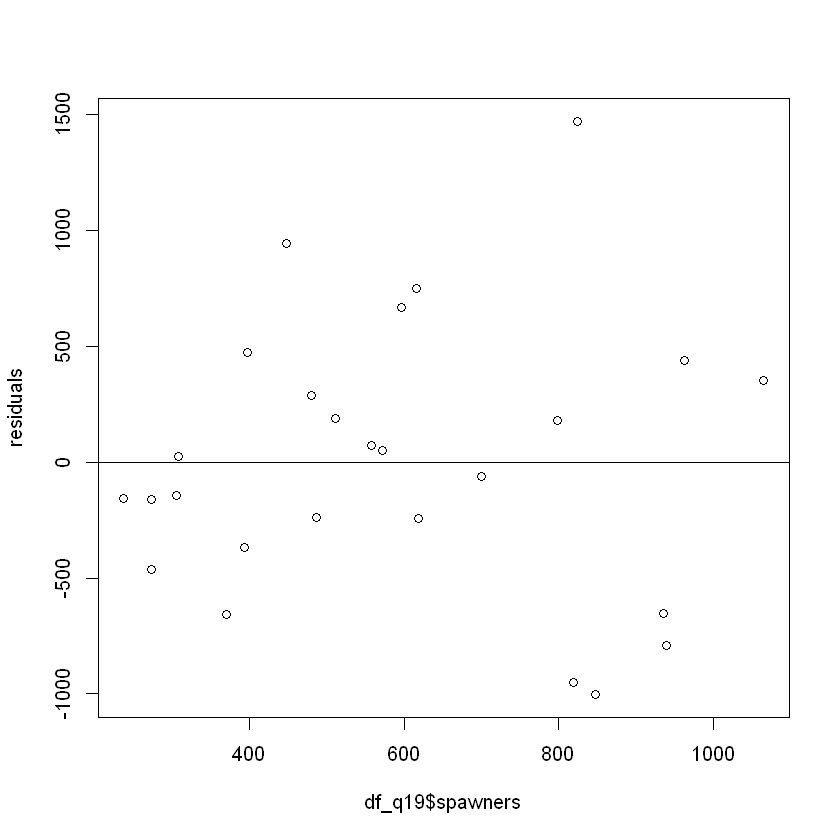

In [14]:
# Residual plot
plot(df_q19$spawners, fit_q19$residuals, ylab = "residuals")
abline(h=0)

Ricker의 이론적 모형을 그대로 추정하려면 비선형모형으로 입문 단계의 수준을 넘어간다. 하지만 위의 모형에서 양변을 $S$로 나누어 다음 식으로 변형시킨 후
$$
\frac{R}{S} = \alpha_{1} exp(\alpha_{2}S)
$$

양변을 $log$ 취하면
$$
log\frac{R}{S} = log \alpha_{1} + \alpha_{2}S
$$
가 되어 $Y = log\frac{R}{S}$, $\beta_{0} = log\alpha_{1}$, $\beta_{1} = \alpha_{2}$로 바꾸면
$$
Y = \beta_{0} + \beta_{1}X
$$
의 선형모형으로 변환시킬 수 있다.


#### d. Spawners를 X변수, $log\frac{Recruits}{Spawners}$를 Y변수로 회귀식을 추정하여 $R^2$값을 구하고 잔차도를 그려라. 
우선 산점도를 그리면 다음과 같다. 변수변환을 한 이후에도, 두 변수 간에는 선형적 연관성이 있다고 보기 어렵다.

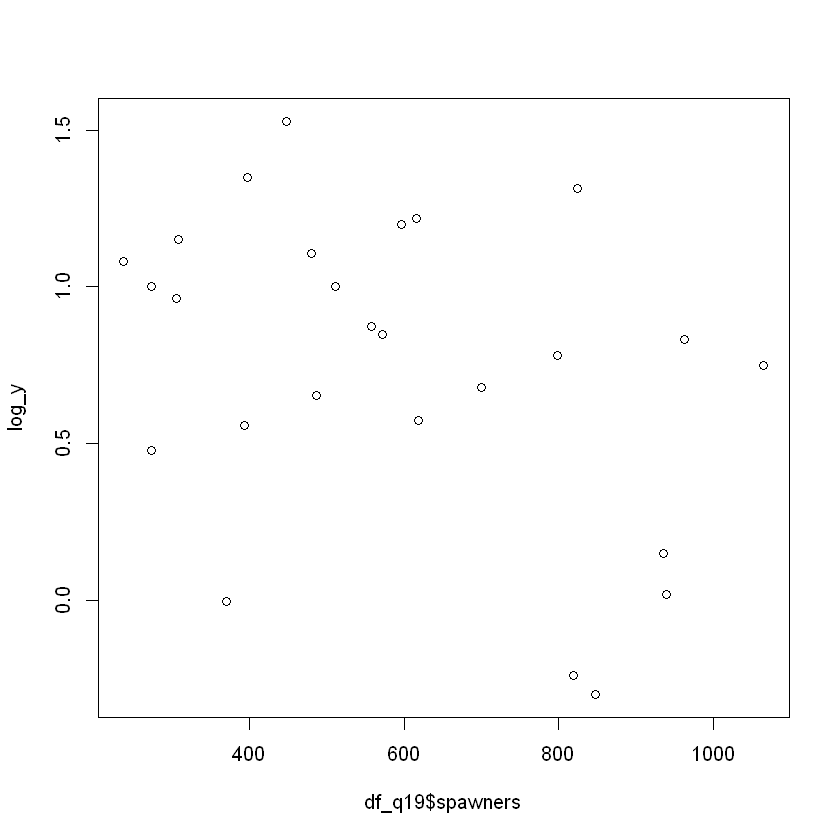

In [15]:
# Changing variables
# Scatter plot
log_y <- log(df_q19$recruits/df_q19$spawners)
plot(log_y ~ df_q19$spawners)

최소제곱추정법으로 회귀식을 구하면 다음과 같다. 

In [16]:
# LSM
fit_q19_log <- lm(log_y ~ df_q19$spawners)
summary(fit_q19_log)
## Calculation
log_y.mean <- mean(log_y)
spawners.mean <- mean(df_q19$spawners)

log_y.sd <-  sd(log_y)
spawners.sd <- sd(df_q19$spawners)
cor_q19_log <- cor(df_q19$spawners,log_y)

(b1_q19_log <- cor_q19_log * log_y.sd / spawners.sd)
(b0_q19_log <- log_y.mean - (b1_q19_log * spawners.mean))


Call:
lm(formula = log_y ~ df_q19$spawners)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92672 -0.29794  0.07007  0.33936  0.74254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.2051299  0.2406018   5.009 4.07e-05 ***
df_q19$spawners -0.0007671  0.0003778  -2.031   0.0535 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4629 on 24 degrees of freedom
Multiple R-squared:  0.1466,	Adjusted R-squared:  0.1111 
F-statistic: 4.124 on 1 and 24 DF,  p-value: 0.05351


[1] -0.0007670954

[1] 1.20513

선형모형으로 변환한 뒤 추정한 회귀식은 다음과 같다.

$$
\hat{y} = 1.21 - 0.0007x
$$

추정된 회귀식을 산점도에 나타내면 다음과 같다. 이때 회귀식에서 많이 벗어나 존재하는 특잇값들이 있음을 확인할 수 있다.

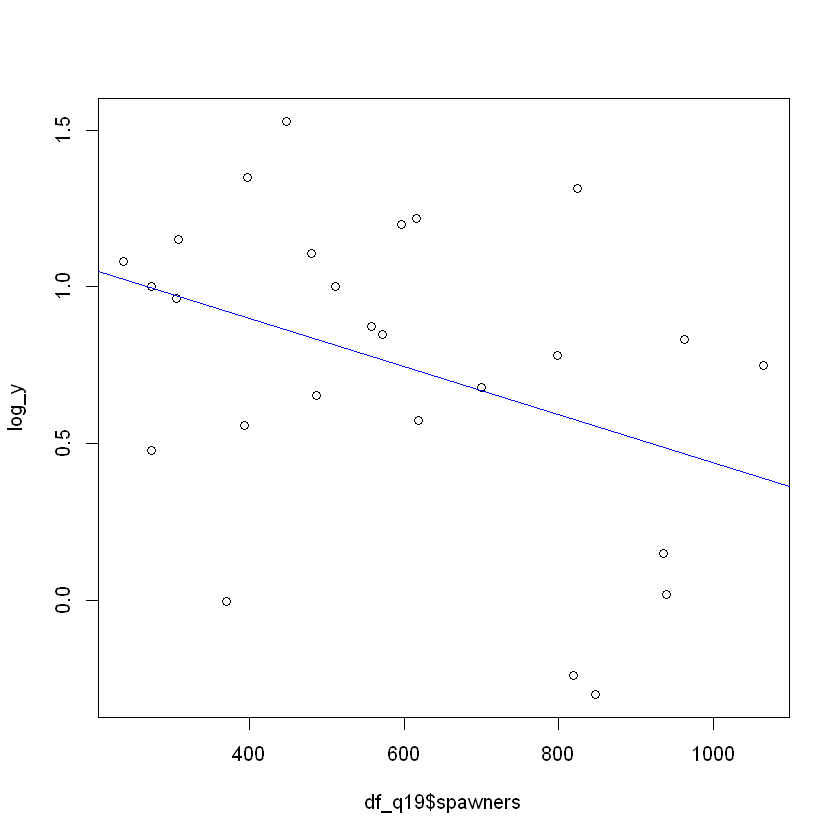

In [18]:
plot(log_y ~ df_q19$spawners)
abline(fit_q19_log, col = "blue")

이때 결정계수  $R^2$은 0.15(15%)로, 작은편이다. 따라서 추정된 회귀식이 주어진 자료를 잘 나타낸다고 보기는 어렵다.

In [19]:
# R squared
log_y.hat <- b0_q19_log + (b1_q19_log * df_q19$spawners)

SSE_q19_log <- sum((log_y - log_y.hat) ^ 2)
SSR_q19_log <- sum((log_y.hat - log_y.mean) ^ 2)
SST_q19_log <- SSE_q19_log + SSR_q19_log

(r2_q19_log <- SSR_q19_log / SST_q19_log)

[1] 0.1466253

잔차그림을 통해 잔차들이 띠 모양으로 분포하고 있음을 확인할 수 있다. 따라서 회귀모형의 가정사항을 충족한다.

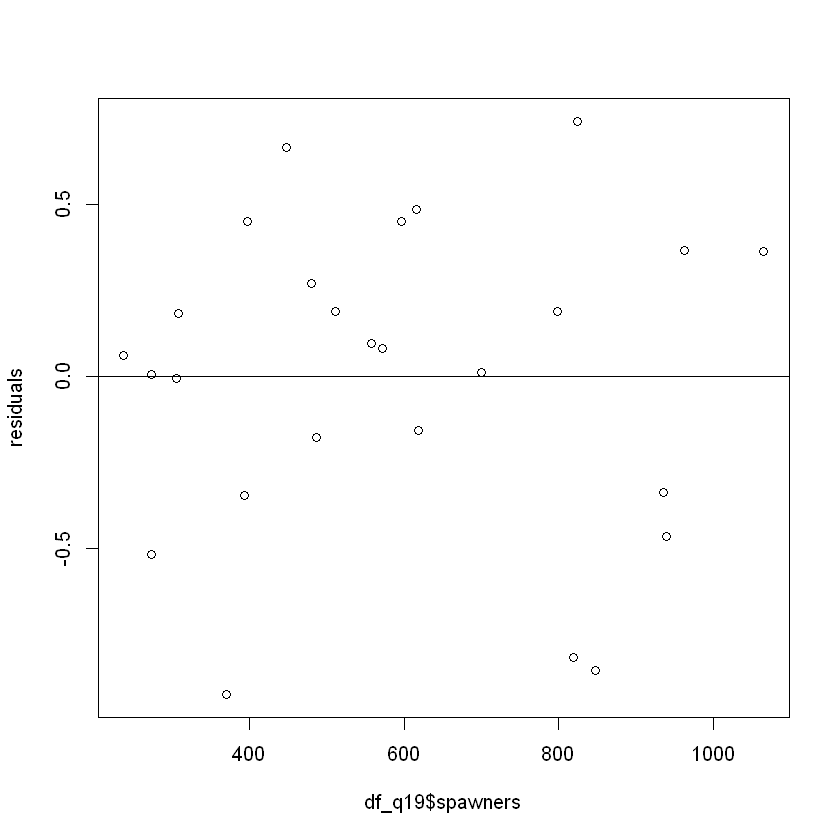

In [20]:
# Residual plot
plot(df_q19$spawners, fit_q19_log$residuals, ylab = "residuals")
abline(h=0)

#### e. 위의 c와 d에서 F값 $R^2$값, 잔차도를 비교하여 모형의 적합성을 비교하여라. 
(변수변환을 하기 전의 모형을 모형1, 변수변환을 한 후의 모형을 모형2이라 함.)

1) 두 모형의 F값을 구하면 다음과 같다.

In [24]:
# F vlaue
## model 1
MSE_q19 <- SSE_q19 / 24 # n - 2, n = 26
MSR_q19 <- SSR_q19
(f.value_q19 <-  MSR_q19 / MSE_q19)

## model 2
MSE_q19_log <- SSE_q19_log / 24
MSR_q19_log <- SSR_q19_log
(f.value_q19_log <-  MSR_q19_log / MSE_q19_log)

[1] 6.623058

[1] 4.123636

F값을 통해 반응변수와 설명변수 사이에 선형연관성을 설정하여 모형화한 것이 타당한지에 대한 통계적 검정을 할 수 있다.

모형1의 F값은 6.62, 모형2의 F값은 4.12이다. 두 모형의 F값은 자유도가 (1, 24)인 F분포를 근사적으로 따른다. 따라서 F값이 더 큰 모형1의 경우가 더 적합한 선형회귀 모형이라고 판단할 수 있다.

2) $R^2$값은 변환 전이 0.22, 변환 후가 0.15였다. 따라서 두 모형의 회귀식 모두 자료들을 나타내기에 적합하다고 보기 어려우나, 모형1의 경우가 비교적 더 적합하다고는 볼 수 있다.

3) 두 모형의 잔차도는 다음과 같다. 
** 잔차도 비교 어렵다 ㅠㅠ 어케 하농

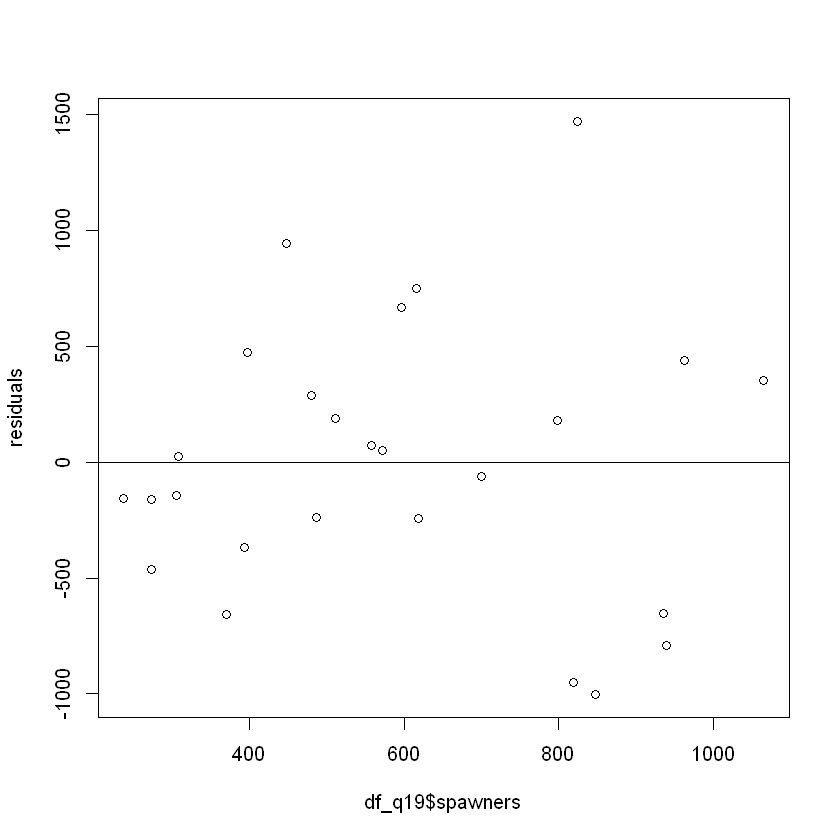

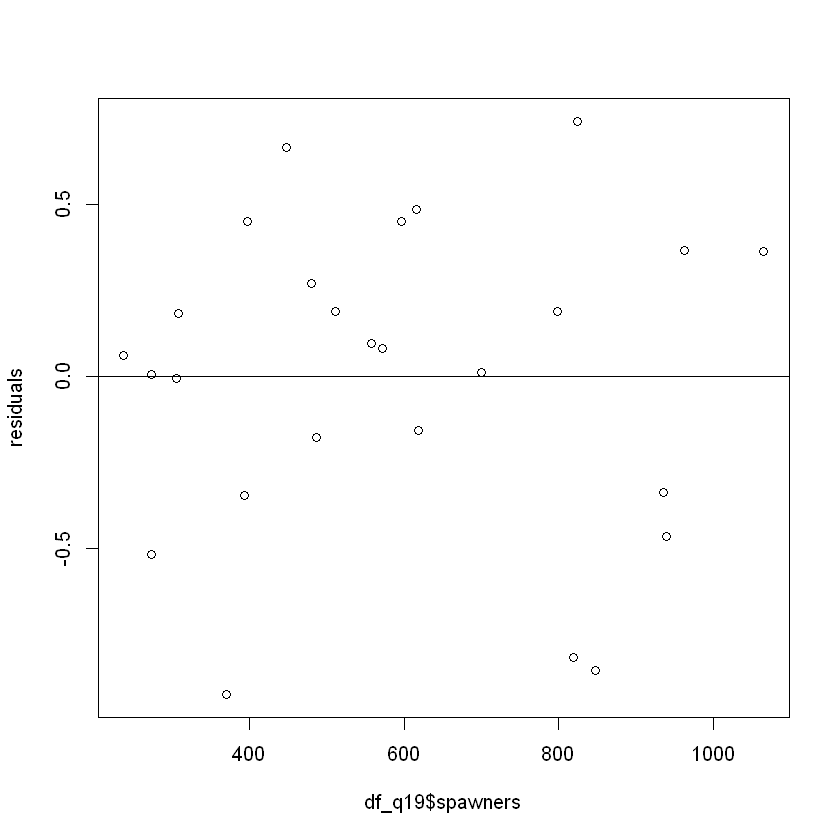

In [56]:
# Residual plot
## original
plot(df_q19$spawners, fit_q19$residuals, ylab = "residuals")
abline(h=0)

## log transformation
plot(df_q19$spawners, fit_q19_log$residuals, ylab = "residuals")
abline(h=0)

#### 21. 유아 돌연사 증후군(Sudden Infant Death Syndrome: SIDS)은 영국에서 매년 1500건 이상이 발생하고 있고, 그 이유는 아직 밝혀지고 있지 않다. 기온이 영향을 주는 것이라 의심되었다. 다음 표는 온도별 SIDS 사망수이다. 3열은 3달 미만 유아의 평균사망률이고 4열은 3달 이상 1년 이하 유아의 평균사망률이다. 자료수집 기간은 1979년 1월 8일부터 1985년 11월 31일까지다. 

#### a. Temp 자료를 각 계급의 중앙값인 16.5, 17.5, ... 등으로 바꾸어라. 마지막 계급은 25도 이상으로 되어 있어 아주 큰 값도 들어갈 수 있지만, 다른 계급과 같은 간격인 25.5로 바꾸어라. 

주어진 자료를 R코드로 나타내면 다음과 같다. 


In [3]:
## Assigning data
temp <- seq(16.5, 25.5, 1)
SIDS <- c(171, 153, 102, 79, 56, 52, 30, 17, 5, 3)
three_months <- c(1.070, 1.033, 1.020, 1.114, 0.857, 0.673, 0.733, 1.118, 1.200, 3.667)
twelve_months <- c(1.105, 0.967, 1.206, 0.962, 0.804, 0.846, 0.833, 0.471, 1.200, 0.333)

temp.k <- rep(temp, SIDS)
three_months.k <- rep(three_months, SIDS)
twelve_months.k <- rep(twelve_months, SIDS)

df <- data.frame(temp.k, three_months.k, twelve_months.k)

이때 주어진 자료로부터 기온 별로 발생한 SIDS 사망자수를 히스토그램으로 나타내면 다음과 같다. 

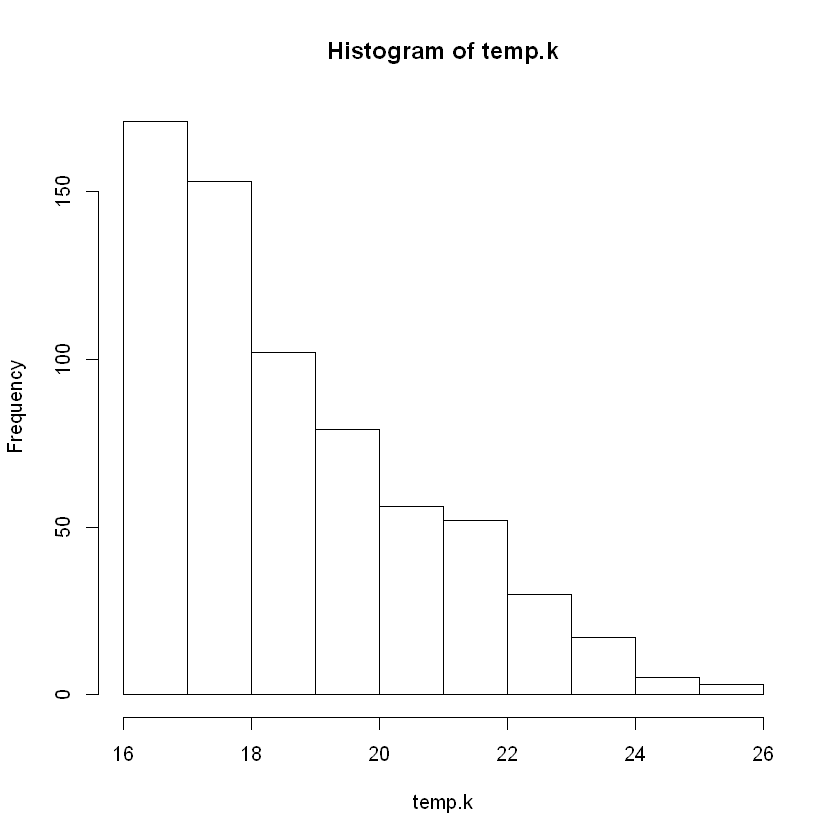

In [4]:
# histogram
hist(temp.k)

기온이 낮을수록 SIDS 사망자수가 많다. 따라서 기온이 SIDS 사망자수에 영향을 주고 있다고 의심되는 상황이다. 

기온이 정말로 SIDS 사망자수에 영향을 주는지 검정하기 위해선 기온에 따른 전체 유아 평균사망률을 고려해야 한다. 만약 기온에 따라 전체 유아 평균사망률 또한 변했다면, SIDS 사망자수의 변화가 순수하게 기온에 따른 것이라 보기 어렵기 때문이다. 

#### b. Temp와 <3 months의 산점도를 그리고 그 패턴을 설명하여라. 온도를 SIDS에 영향을 주는 요인으로 의심할 정도의 패턴이 보이는가? Temp와 3-12 months의 산점도를 그리고 그 패턴을 < 3months의 경우와 비교하여 설명하여라.

우선 Temp를 X변수, <3 months를 Y변수로 하여 산점도를 그려보면 다음과 같다.

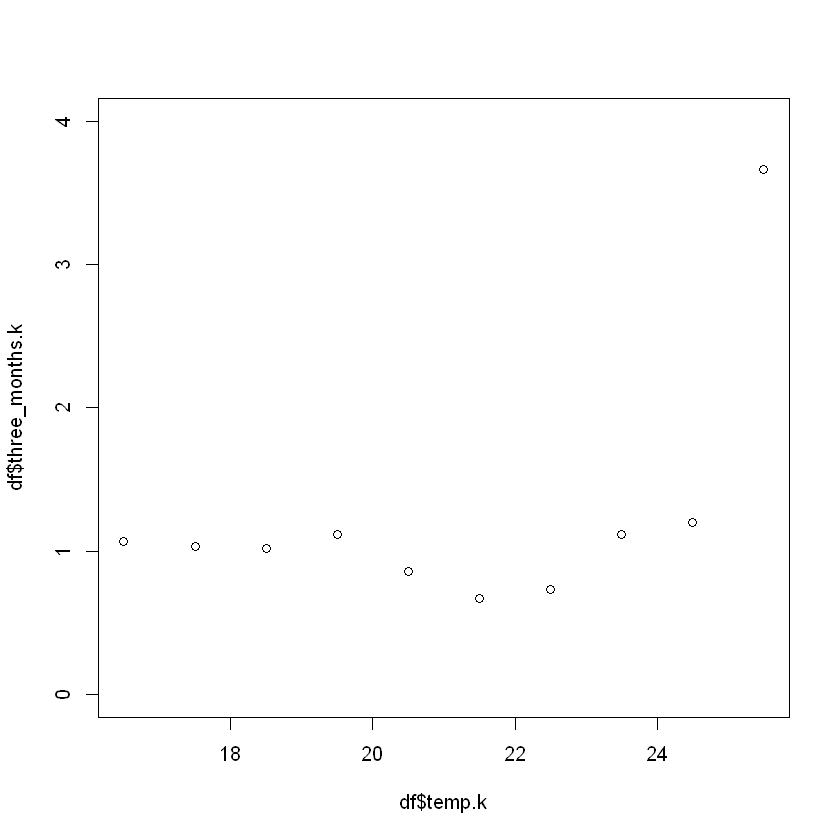

In [5]:
# Scatter plot
plot(df$temp.k, df$three_months.k, ylim = c(0, 4))

3달 미만 유아의 평균사망률(<3 months)과 기온(Temp) 간에 뚜렷한 패턴이 있다고 보기는 어렵다.

Temp를 X변수 3-12 months를 Y변수로 하여 산점도를 그려보면 다음과 같다.

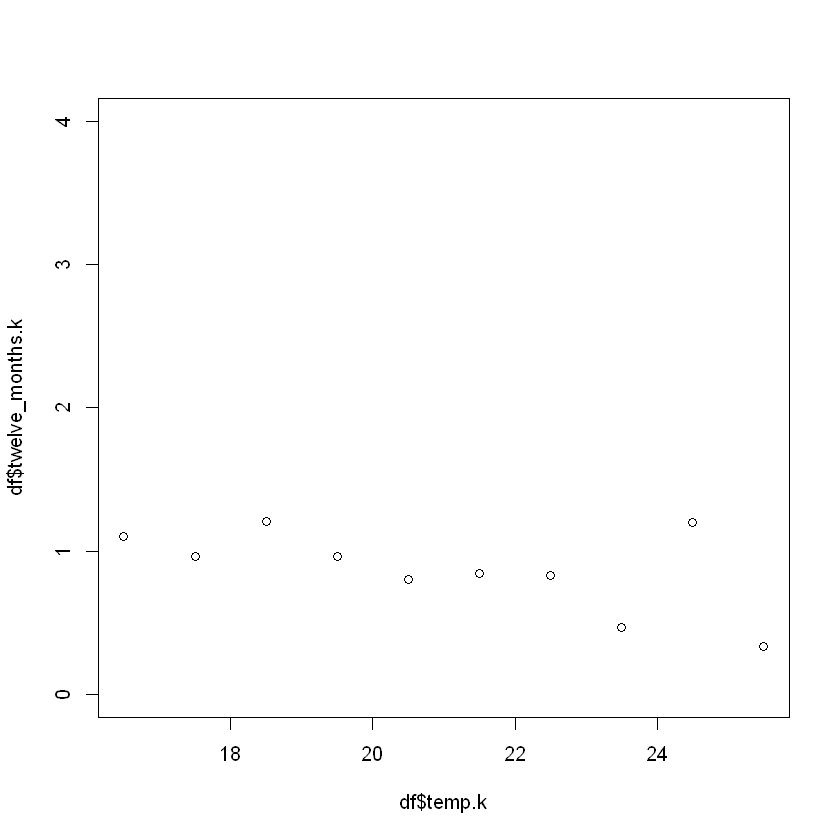

In [6]:
# Scatter plot
plot(df$temp.k, df$twelve_months.k, ylim = c(0, 4))

이 경우에도 3달 이상 1년 이하 유아의 평균사망률(3 ~ 12 months)과 기온(Temp) 간에 뚜렷한 패턴이 존재한다고 보기 어렵다. 
따라서 Temp와 SIDS 사망자수 간에 나타나는 연관성이 전체 유아 평균사망률과 같은 요인의 영향을 받지 않고 순수하게 두 요인의 상호작용으로만 이뤄졌을 가능성을 배제할 수 없다. 

#### c. Temp와 Total number of SIDS deaths의 산점도를 그리지 않는 이유는 무엇인가?

두 변수 간의 상관관계를 확인하는 것이 무의미하기 때문이다. 예를 들어, 영국의 평균 기온이 16.0 ~ 16.9 사이라면, 해당 기온 구간에서 SIDS 사망자수가 많은 것이 정말로 기온에 의한 것인지, 아니면 단순히 조사 기간 중 해당 기온에 해당되는 기간이 길어서 관찰되는 SIDS 사망자수도 많아진 것인지를 판단하기가 모호하다. 

다음 자료는 하루 평균 온도가 19도를 넘었을 때의 온도이고 그 다음날의 SIDS deaths를 조사한 자료의 일부분이다. 

In [11]:
# Assigning data
temp_19 <- c(19.7, 20.9, 19.1, 19.8, 20.4, 22.9, 21.5, 20.0, 19.4, 21.5,
             21.1, 19.9, 21.9, 19.7, 20.1, 20.5, 20.5, 19.5, 20.6, 21.1,
             19.1, 19.4, 19.0, 19.0, 19.6, 20.7, 19.6, 21.4, 22.4, 19.1)
SIDS_19 <- c(0, 0, 0, 0, 1, 1, 0, 2, 0, 1,
             1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 
             0, 1, 2, 4, 0, 0, 1, 0, 0, 1)
df_q21_19 <- data.frame(temp_19, SIDS_19)

#### e. Temp와 SIDS deaths의 산점도를 그려라

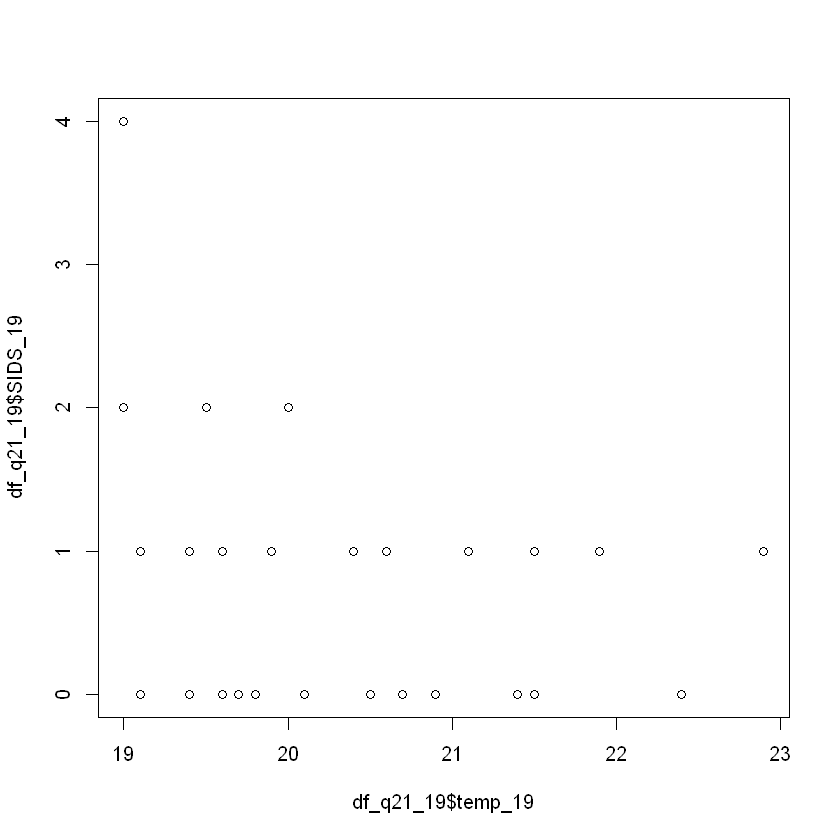

In [12]:
# Scatter plot
plot(df_q21_19$SIDS_19 ~ df_q21_19$temp_19)

#### f. 점들이 너무 많이 겹치게 되면 얼마나 많은 점들이 있는지 보기 힘들게 된다. jittering 기법을 이용하여 산점도를 다시 그려 b에서의 패턴과 비교하여라. 온도를 SIDS에 영향을 주는 요인으로 의심할 정도인가?

jittering 기법을 이용하여 산점도를 그려보면 다음과 같다.

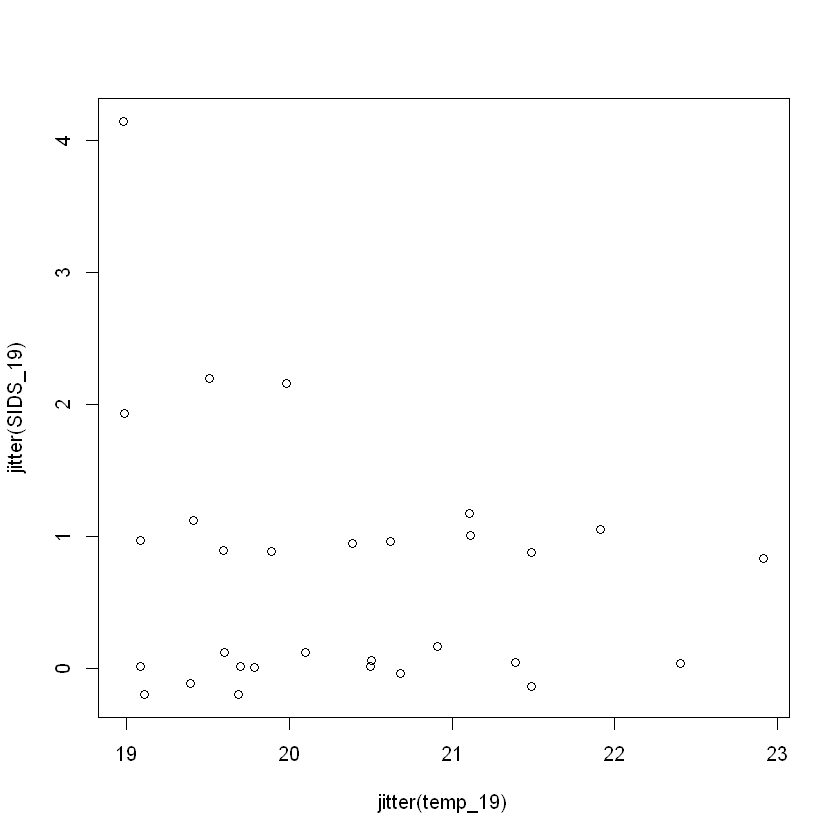

In [13]:
# Scatter plot
plot(jitter(SIDS_19) ~ jitter(temp_19))

SIDS 사망자수가 0, 1일 때는 기온에 따라 분포가 비교적 고르게 존재하고 있으나, 사망자수가 2, 4일 때는 기온이 낮을 때로 치우쳐 분포하고 있다. 앞서 b에서 기온과 유아 평균사망률 간의 산점도를 그려보았을 때는 두 변수 간 뚜렷한 패턴이 존재한다고 보기 어려웠던 점을 고려했을 때, 기온이 SIDS 사망자수에 영향을 주는 요인으로 볼 여지가 있다. 